# Simple Regression Analysis

### 1. Introduction
Simple Linear Regression models the relationship between two variables (one independent variable X and one dependent variable Y) using the equation:

In [67]:
from IPython.display import display, Math
display(Math(r'Y = \beta_0 + \beta_1 X + \epsilon'))

<IPython.core.display.Math object>

Where:
- \( $Y$ \): Dependent variable (response variable)
- \( $X$ \): Independent variable (predictor)
- \( $\beta_0$ \): Intercept (constant term)
- \( $\beta_1$ \): Slope (coefficient for X)
- \( $\epsilon$ \): Error term (random noise)

The goal is to find the best values of \( $\beta_0$ \) and \( $\beta_1$ \) that minimize the residual sum of squares ($RSS$).

In [68]:
!pip install statsmodels tabulate

In [69]:
!python -m pip install --upgrade pip

In [70]:
!pip install scikit-learn

## The Simple Linear Regression

### Simulation

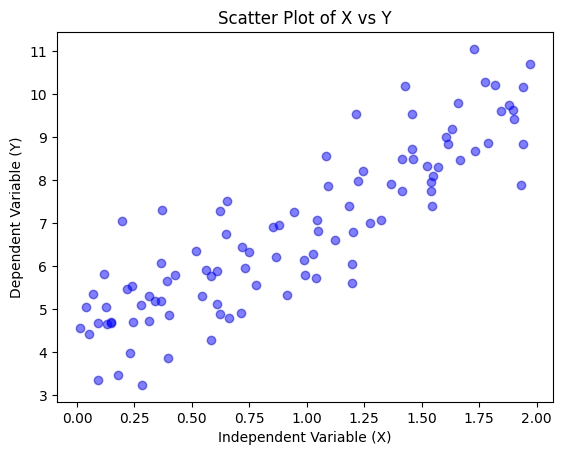

Estimated Regression Equation: Y = 4.14 + 2.80X
Mean Squared Error: 0.65
R-squared: 0.81


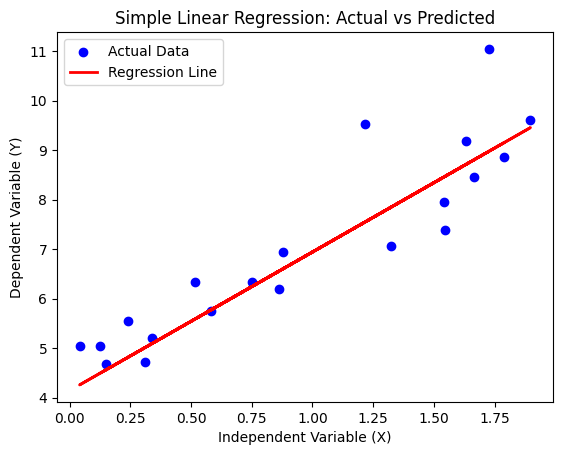

In [71]:
### Simple Linear Regression in Jupyter Notebook

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Understanding Simple Linear Regression
"""
Simple Linear Regression models the relationship between two variables (one independent variable X and one dependent variable Y) using the equation:

    Y = β0 + β1 * X + ε

Where:
- Y: Dependent variable (response variable)
- X: Independent variable (predictor)
- β0: Intercept (constant term)
- β1: Slope (coefficient for X)
- ε: Error term (random noise)

The goal is to find the best values of β0 and β1 that minimize the residual sum of squares (RSS).
"""

# Step 2: Generate Synthetic Data
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # Generate 100 random values for X
Y = 4 + 3 * X + np.random.randn(100, 1)  # Generate Y using the equation Y = 4 + 3X + noise

# Step 3: Convert Data into Pandas DataFrame
data = pd.DataFrame({'X': X.flatten(), 'Y': Y.flatten()})
data.head()

# Step 4: Visualize the Data
plt.scatter(X, Y, color='blue', alpha=0.5)
plt.xlabel("Independent Variable (X)")
plt.ylabel("Dependent Variable (Y)")
plt.title("Scatter Plot of X vs Y")
plt.show()

# Step 5: Split Data into Training and Testing Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 6: Train the Simple Linear Regression Model
model = LinearRegression()
model.fit(X_train, Y_train)

# Step 7: Extract Model Parameters
beta_0 = model.intercept_[0]  # Intercept
beta_1 = model.coef_[0][0]  # Slope
print(f"Estimated Regression Equation: Y = {beta_0:.2f} + {beta_1:.2f}X")

# Step 8: Make Predictions
Y_pred = model.predict(X_test)

# Step 9: Evaluate Model Performance
mse = mean_squared_error(Y_test, Y_pred)  # Mean Squared Error
r2 = r2_score(Y_test, Y_pred)  # R-squared value
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Step 10: Visualizing Regression Line
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Independent Variable (X)")
plt.ylabel("Dependent Variable (Y)")
plt.title("Simple Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

### Linear Equation

In [72]:
# Import necessary libraries
from IPython.display import display, Math, Latex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta
import seaborn as sns
import statsmodels.api as sm
from tabulate import tabulate

### Linear Equation

In [73]:
file_path = r"D:\Stata-Tutorial\stata\food.dta"
df = pd.read_stata(file_path, convert_categoricals=False)
print(df.head())

   food_exp  income
0    115.22    3.69
1    135.98    4.39
2    119.34    4.75
3    114.96    6.03
4    187.05   12.47


In [74]:
df.head()

,food_exp,income
0,115.22,3.69
1,135.98,4.39
2,119.34,4.75
3,114.96,6.03
4,187.05,12.47


In [75]:
df.shape

(40, 2)

In [76]:
df.isnull().sum()

food_exp    0
income      0
dtype: int64

In [77]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   food_exp  40 non-null     float64
 1   income    40 non-null     float64
dtypes: float64(2)
memory usage: 772.0 bytes


In [78]:
summary = df.describe(include="all").transpose()
summary["missing"] = df.isnull().sum()
summary["unique"] = df.nunique()
print(summary)

          count       mean         std     min       25%     50%       75%  \
food_exp   40.0  283.57350  112.675181  109.71  200.3775  264.48  363.3250   
income     40.0   19.60475    6.847773    3.69   17.1100   20.03   24.3975   

             max  missing  unique  
food_exp  587.66        0      40  
income     33.40        0      40  


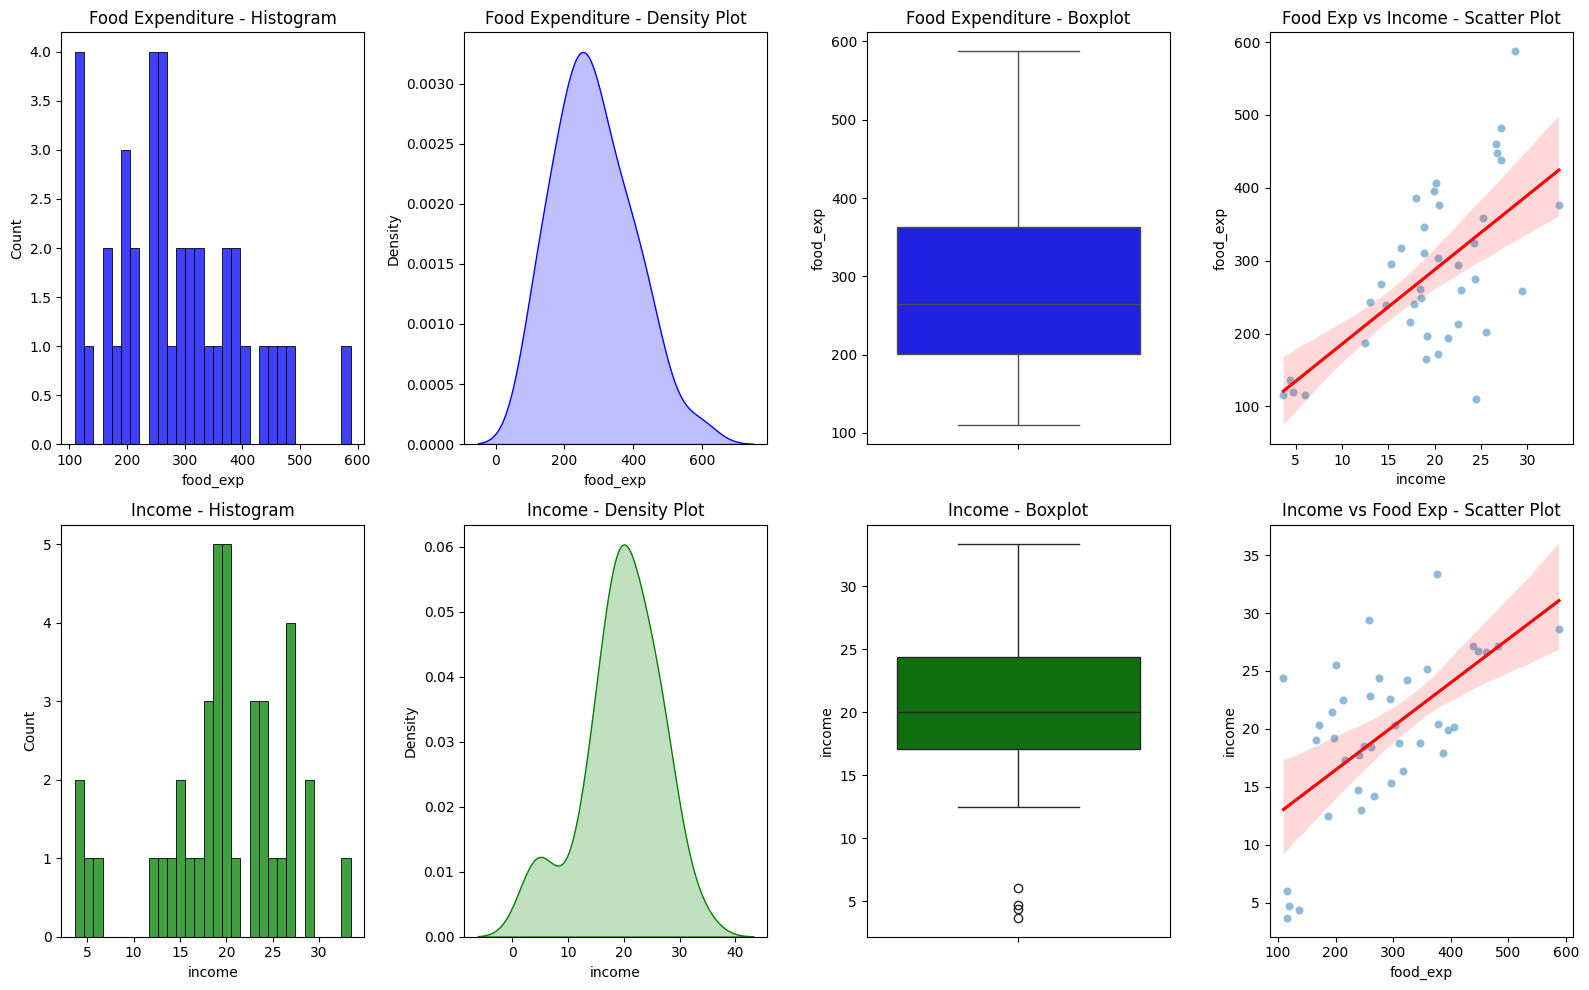

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and layout (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(16, 10))  

# ---- FOOD EXPENDITURE VISUALIZATIONS ----
# Histogram
sns.histplot(df['food_exp'], bins=30, kde=False, color="blue", ax=axes[0, 0])
axes[0, 0].set_title("Food Expenditure - Histogram")

# KDE Plot
sns.kdeplot(df['food_exp'], fill=True, color="blue", ax=axes[0, 1])
axes[0, 1].set_title("Food Expenditure - Density Plot")

# Boxplot
sns.boxplot(y=df['food_exp'], color="blue", ax=axes[0, 2])
axes[0, 2].set_title("Food Expenditure - Boxplot")

# Scatter Plot (vs Income)
sns.scatterplot(x=df['income'], y=df['food_exp'], alpha=0.5, ax=axes[0, 3])
sns.regplot(x=df['income'], y=df['food_exp'], scatter=False, ax=axes[0, 3], color="red")
axes[0, 3].set_title("Food Exp vs Income - Scatter Plot")

# ---- INCOME VISUALIZATIONS ----
# Histogram
sns.histplot(df['income'], bins=30, kde=False, color="green", ax=axes[1, 0])
axes[1, 0].set_title("Income - Histogram")

# KDE Plot
sns.kdeplot(df['income'], fill=True, color="green", ax=axes[1, 1])
axes[1, 1].set_title("Income - Density Plot")

# Boxplot
sns.boxplot(y=df['income'], color="green", ax=axes[1, 2])
axes[1, 2].set_title("Income - Boxplot")

# Scatter Plot (vs Food Expenditure)
sns.scatterplot(x=df['food_exp'], y=df['income'], alpha=0.5, ax=axes[1, 3])
sns.regplot(x=df['food_exp'], y=df['income'], scatter=False, ax=axes[1, 3], color="red")
axes[1, 3].set_title("Income vs Food Exp - Scatter Plot")

# Adjust layout
plt.tight_layout()
plt.show()

In [80]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm

# Assuming your dataset is already loaded as `df` with columns 'food_exp' and 'income'

# Define dependent and independent variables
X = df['income']  # Independent variable
y = df['food_exp']  # Dependent variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the simple linear regression model
model = sm.OLS(y, X).fit()

# Print the OLS regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               food_exp   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     23.79
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           1.95e-05
Time:                        13:12:04   Log-Likelihood:                -235.51
No. Observations:                  40   AIC:                             475.0
Df Residuals:                      38   BIC:                             478.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.4160     43.410      1.922      0.0

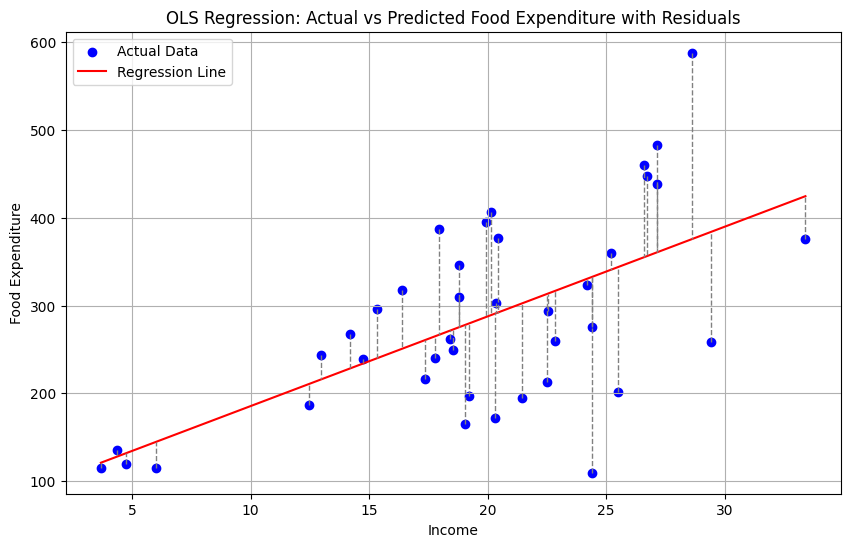

In [81]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Define dependent and independent variables using your loaded DataFrame
X = sm.add_constant(df['income'])  # Adding constant for intercept
y = df['food_exp']

# Run OLS regression
model = sm.OLS(y, X).fit()

# Calculate predicted values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Add predicted values and residuals to the DataFrame for reference
df['Predicted'] = y_pred
df['Residuals'] = residuals

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
plt.scatter(df['income'], df['food_exp'], color='blue', label='Actual Data')

# Regression line (predicted values)
plt.plot(df['income'], y_pred, color='red', label='Regression Line')

# Plot residuals as vertical lines
for i in range(len(df)):
    plt.plot([df['income'][i], df['income'][i]], 
             [df['food_exp'][i], df['Predicted'][i]], 
             color='gray', linestyle='--', linewidth=1)

# Add labels and legend
plt.xlabel('Income')
plt.ylabel('Food Expenditure')
plt.title('OLS Regression: Actual vs Predicted Food Expenditure with Residuals')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [82]:
import pandas as pd
import statsmodels.api as sm

# Define dependent and independent variables using your loaded DataFrame
X = sm.add_constant(df['income'])  # Adding constant for intercept
y = df['food_exp']

# Run OLS regression
model = sm.OLS(y, X).fit()

# Extract the coefficient for 'income' (β1)
beta_income = model.params['income']

# Compute mean values of 'income' and 'food_exp'
mean_income = df['income'].mean()
mean_food_exp = df['food_exp'].mean()

# Calculate elasticity at the mean point
elasticity_at_mean = beta_income * (mean_income / mean_food_exp)

# Print the result
print(f"Elasticity at the mean point: {elasticity_at_mean:.4f}")

Elasticity at the mean point: 0.7058


In [83]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy.stats import norm

# Define dependent and independent variables using your loaded DataFrame
# Assume log-log transformation for income and food expenditure
df['log_income'] = np.log(df['income'])
df['log_food_exp'] = np.log(df['food_exp'])

# Define the log-log model
X = sm.add_constant(df['log_income'])  # Adding constant for intercept
y = df['log_food_exp']

# Run OLS regression with robust standard errors
model = sm.OLS(y, X).fit(cov_type='HC0')  # HC0: Heteroskedasticity-consistent standard errors

# Extract marginal effect (coefficient of 'log_income')
marginal_effect = model.params['log_income']

# Extract robust standard error
robust_se = model.bse['log_income']

# Calculate z-value
z_value = marginal_effect / robust_se

# Calculate p-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z_value)))

# Calculate 95% confidence interval
confidence_level = 0.95
critical_value = norm.ppf(1 - (1 - confidence_level) / 2)
ci_lower = marginal_effect - critical_value * robust_se
ci_upper = marginal_effect + critical_value * robust_se

# Create a DataFrame for the results
results_table = pd.DataFrame({
    "Statistic": ["Marginal Effect (ey/ex)", "Robust Std. Err.", "Z-Value", "P>|z|", 
                  "95% CI Lower", "95% CI Upper"],
    "Value": [f"{marginal_effect:.6f}", f"{robust_se:.6f}", f"{z_value:.2f}", 
              f"{p_value:.3f}", f"{ci_lower:.6f}", f"{ci_upper:.6f}"]
})

# Display the results table in an academic format
print("\n**Table 3: Conditional Marginal Effect and Robust Statistics (Delta Method)**\n")
print(results_table.to_markdown(index=False))


**Table 3: Conditional Marginal Effect and Robust Statistics (Delta Method)**

| Statistic               |    Value |
|:------------------------|---------:|
| Marginal Effect (ey/ex) | 0.555881 |
| Robust Std. Err.        | 0.064949 |
| Z-Value                 | 8.56     |
| P>|z|                   | 0        |
| 95% CI Lower            | 0.428584 |
| 95% CI Upper            | 0.683179 |


In [84]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Define dependent and independent variables using your loaded DataFrame
# Assume log-log transformation for income and food expenditure
df['log_income'] = np.log(df['income'])
df['log_food_exp'] = np.log(df['food_exp'])

# Define the log-log model
X = sm.add_constant(df['log_income'])  # Adding constant for intercept
y = df['log_food_exp']

# Run OLS regression with robust standard errors
model = sm.OLS(y, X).fit(cov_type='HC0')  # HC0: Heteroskedasticity-consistent standard errors

# Extract the coefficient for 'log_income' (β1)
beta_log_income = model.params['log_income']

# Compute elasticity for each observation
df['Elasticity'] = beta_log_income * (df['income'] / df['food_exp'])

# Calculate the average elasticity
average_elasticity = df['Elasticity'].mean()

# Display the average elasticity
print(f"Average Elasticity: {average_elasticity:.6f}")

# Create a DataFrame for the results
results_table = pd.DataFrame({
    "Statistic": ["Average Elasticity"],
    "Value": [f"{average_elasticity:.6f}"]
})

# Display the results table in an academic format
print("\n**Table 4: Average Elasticity**\n")
print(results_table.to_markdown(index=False))

Average Elasticity: 0.041108

**Table 4: Average Elasticity**

| Statistic          |    Value |
|:-------------------|---------:|
| Average Elasticity | 0.041108 |


### Quadratic Equation (Non-Linear Relation)

                            OLS Regression Results                            
Dep. Variable:               food_exp   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     11.58
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           0.000124
Time:                        13:12:05   Log-Likelihood:                -235.51
No. Observations:                  40   AIC:                             477.0
Df Residuals:                      37   BIC:                             482.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             81.9829     73.090      1.

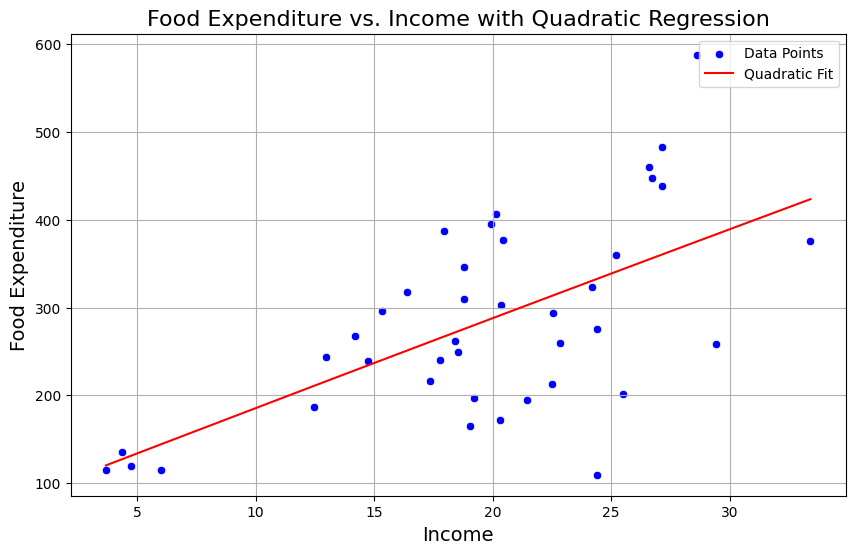

In [85]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming your dataset is already loaded as `df` with columns 'food_exp' and 'income'

# Step 1: Add income squared as a new variable
df['income_squared'] = df['income']**2

# Step 2: Define dependent and independent variables
X = df[['income', 'income_squared']]  # Independent variables (income and income squared)
y = df['food_exp']                    # Dependent variable

# Step 3: Add a constant to the model (intercept)
X = sm.add_constant(X)

# Step 4: Fit the quadratic regression model
model = sm.OLS(y, X).fit()

# Step 5: Print the regression summary
print(model.summary())

# Step 6: Predict food expenditure using the fitted quadratic model
df['predicted_food_exp_quad'] = model.predict(X)

# Step 7: Sort the data by income for smooth plotting
df_sorted = df.sort_values(by='income')

# Step 8: Scatter plot with quadratic regression curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='food_exp', data=df, color='blue', label='Data Points')
plt.plot(df_sorted['income'], df_sorted['predicted_food_exp_quad'], color='red', label='Quadratic Fit')
plt.title('Food Expenditure vs. Income with Quadratic Regression', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Food Expenditure', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [86]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming your dataset is already loaded as `df` with columns 'food_exp' and 'income'

# Step 1: Add income squared as a new variable
df['income_squared'] = df['income']**2

# Step 2: Define dependent and independent variables
X = df[['income', 'income_squared']]  # Independent variables (income and income squared)
y = df['food_exp']                    # Dependent variable

# Step 3: Add a constant to the model (intercept)
X = sm.add_constant(X)

# Step 4: Fit the quadratic regression model
model = sm.OLS(y, X).fit()

# Step 5: Extract coefficients
beta_1 = model.params['income']         # Coefficient of income
beta_2 = model.params['income_squared'] # Coefficient of income_squared

# Step 6: Compute the marginal effect at the mean (MEM)
mean_income = df['income'].mean()  # Mean of income
marginal_effect_at_mean = beta_1 + 2 * beta_2 * mean_income

# Step 7: Compute the average marginal effect (AME)
# Marginal effect for each observation
df['marginal_effect'] = beta_1 + 2 * beta_2 * df['income']
average_marginal_effect = df['marginal_effect'].mean()

# Step 8: Print results
print(f"Marginal Effect at Mean (MEM): {marginal_effect_at_mean:.4f}")
print(f"Average Marginal Effect (AME): {average_marginal_effect:.4f}")

# Optional: Print the marginal effects for all observations
print("\nMarginal Effects for All Observations:")
print(df[['income', 'marginal_effect']])

Marginal Effect at Mean (MEM): 10.1859
Average Marginal Effect (AME): 10.1859

Marginal Effects for All Observations:
    income  marginal_effect
0     3.69        10.364365
1     4.39        10.356514
2     4.75        10.352477
3     6.03        10.338123
4    12.47        10.265902
5    12.98        10.260182
6    14.20        10.246501
7    14.76        10.240221
8    15.32        10.233941
9    16.39        10.221941
10   17.35        10.211175
11   17.77        10.206465
12   17.93        10.204671
13   18.43        10.199064
14   18.55        10.197718
15   18.80        10.194914
16   18.81        10.194802
17   19.04        10.192223
18   19.22        10.190204
19   19.93        10.182242
20   20.13        10.179999
21   20.33        10.177756
22   20.37        10.177308
23   20.43        10.176635
24   21.45        10.165196
25   22.52        10.153197
26   22.55        10.152860
27   22.86        10.149384
28   24.20        10.134356
29   24.39        10.132226
30   24.42    

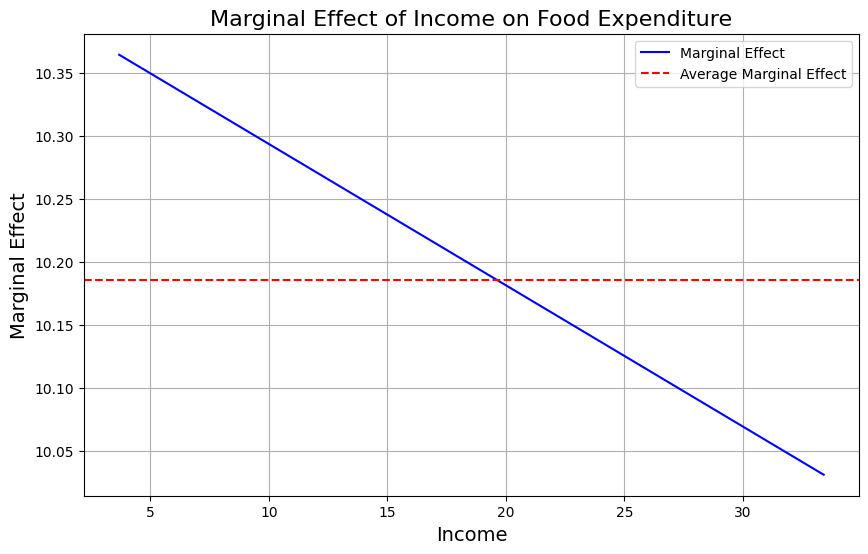

In [87]:
import matplotlib.pyplot as plt

# Plot marginal effects
plt.figure(figsize=(10, 6))
plt.plot(df['income'], df['marginal_effect'], color='blue', label='Marginal Effect')
plt.axhline(y=average_marginal_effect, color='red', linestyle='--', label='Average Marginal Effect')
plt.title('Marginal Effect of Income on Food Expenditure', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Marginal Effect', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

### Regression with third degree polynomial

                            OLS Regression Results                            
Dep. Variable:               food_exp   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     7.584
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           0.000469
Time:                        13:12:06   Log-Likelihood:                -235.44
No. Observations:                  40   AIC:                             478.9
Df Residuals:                      36   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             46.0813    123.602      0.

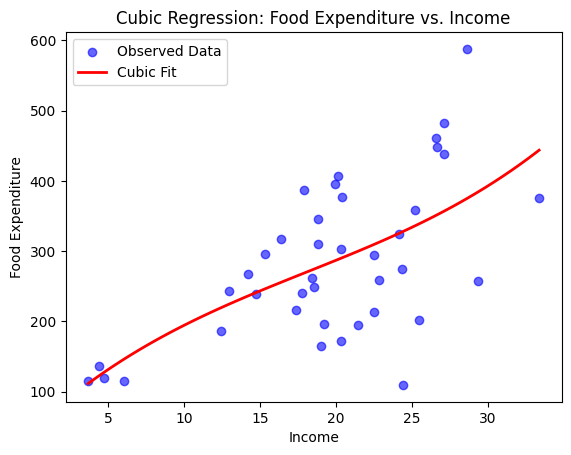

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming df is already loaded with 'food_exp' and 'income'

# Creating quadratic and cubic terms
df['income_squared'] = df['income'] ** 2
df['income_cubed'] = df['income'] ** 3

# Defining independent (X) and dependent (Y) variables
X = df[['income', 'income_squared', 'income_cubed']]
X = sm.add_constant(X)  # Adding constant term for intercept
Y = df['food_exp']

# Fitting the cubic model
model = sm.OLS(Y, X).fit()
print(model.summary())

# Generating predictions for plotting
income_range = np.linspace(df['income'].min(), df['income'].max(), 100)
income_squared_range = income_range ** 2
income_cubed_range = income_range ** 3
X_pred = sm.add_constant(pd.DataFrame({'income': income_range, 'income_squared': income_squared_range, 'income_cubed': income_cubed_range}))
predictions = model.predict(X_pred)

# Plotting
plt.scatter(df['income'], df['food_exp'], label='Observed Data', color='blue', alpha=0.6)
plt.plot(income_range, predictions, label='Cubic Fit', color='red', linewidth=2)
plt.xlabel('Income')
plt.ylabel('Food Expenditure')
plt.title('Cubic Regression: Food Expenditure vs. Income')
plt.legend()
plt.show()

###  Log-linear model

Log-Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:           food_exp_log   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     27.26
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           6.63e-06
Time:                        13:12:06   Log-Likelihood:                -10.942
No. Observations:                  40   AIC:                             25.88
Df Residuals:                      38   BIC:                             29.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7880

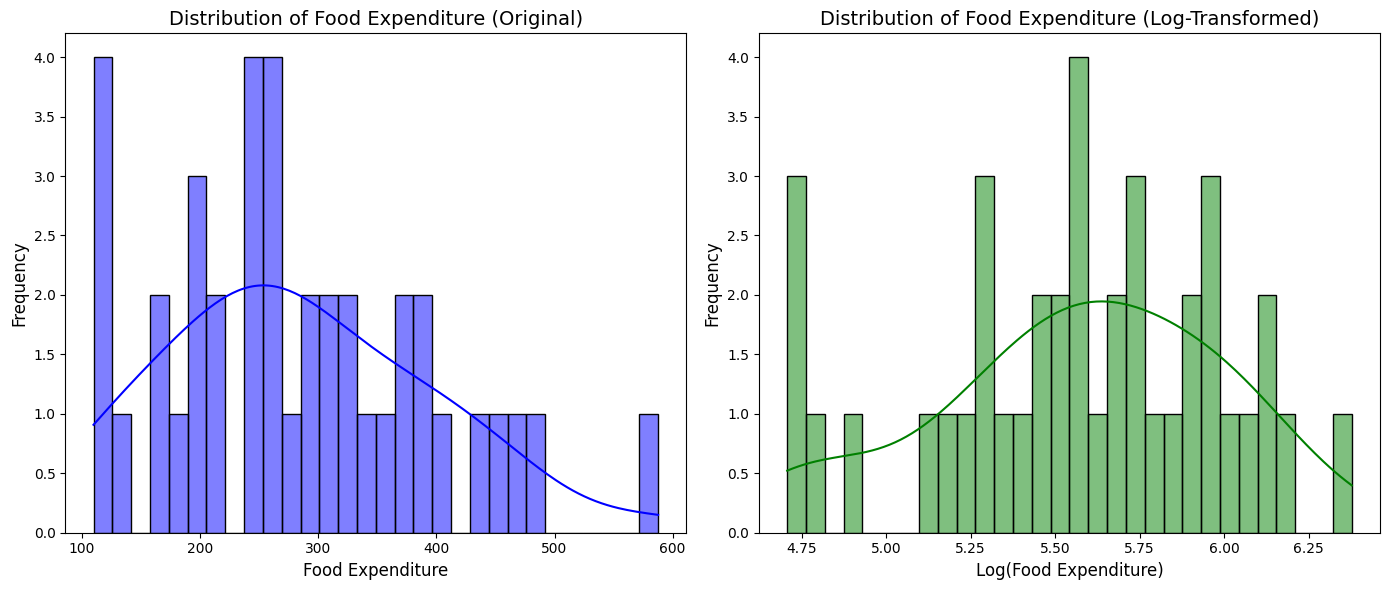

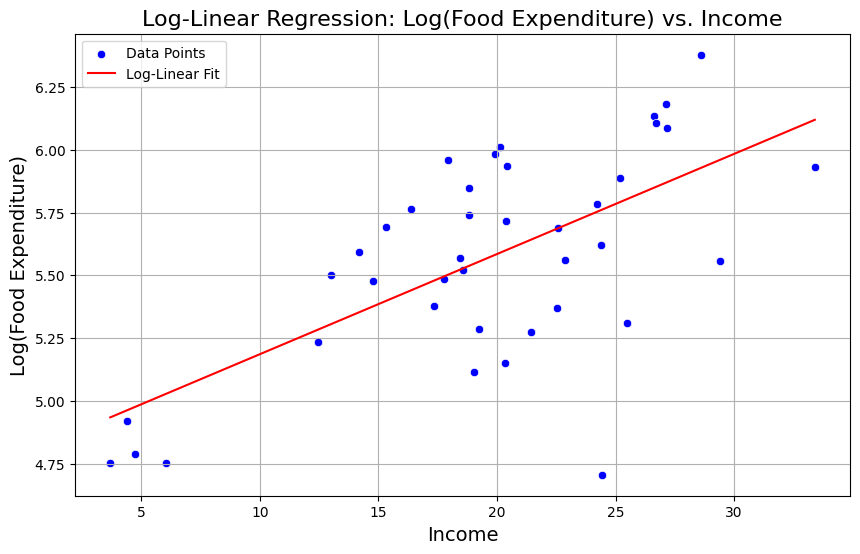

In [89]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming your dataset is already loaded as `df` with columns 'food_exp' and 'income'

# Step 1: Handle zero or negative values in food_exp (if any)
# Add a small constant to avoid log(0) or log(negative)
df['food_exp_log'] = np.log(df['food_exp'] + 1)

# Step 2: Define dependent and independent variables
X = df['income']  # Independent variable
y = df['food_exp_log']  # Dependent variable (log-transformed)

# Step 3: Add a constant to the model (intercept)
X = sm.add_constant(X)

# Step 4: Fit the log-linear regression model
model = sm.OLS(y, X).fit()

# Step 5: Print the OLS regression results
print("Log-Linear Regression Results:")
print(model.summary())

# Step 6: Visualize food_exp before and after log transformation
plt.figure(figsize=(14, 6))

# Original food_exp distribution
plt.subplot(1, 2, 1)
sns.histplot(df['food_exp'], kde=True, color='blue', bins=30)
plt.title('Distribution of Food Expenditure (Original)', fontsize=14)
plt.xlabel('Food Expenditure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Log-transformed food_exp distribution
plt.subplot(1, 2, 2)
sns.histplot(df['food_exp_log'], kde=True, color='green', bins=30)
plt.title('Distribution of Food Expenditure (Log-Transformed)', fontsize=14)
plt.xlabel('Log(Food Expenditure)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# Step 7: Scatter plot with log-linear regression line
plt.figure(figsize=(10, 6))

# Scatter plot of original data
sns.scatterplot(x='income', y='food_exp_log', data=df, color='blue', label='Data Points')

# Predict food expenditure using the fitted log-linear model
df['predicted_food_exp_log'] = model.predict(X)

# Sort the data by income for smooth plotting
df_sorted = df.sort_values(by='income')

# Plot the log-linear regression line
plt.plot(df_sorted['income'], df_sorted['predicted_food_exp_log'], color='red', label='Log-Linear Fit')
plt.title('Log-Linear Regression: Log(Food Expenditure) vs. Income', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Log(Food Expenditure)', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

### Linear-Log Model

Linear-Log Regression Results:
                            OLS Regression Results                            
Dep. Variable:               food_exp   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     21.46
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           4.16e-05
Time:                        13:12:08   Log-Likelihood:                -236.28
No. Observations:                  40   AIC:                             476.6
Df Residuals:                      38   BIC:                             479.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -146.8546

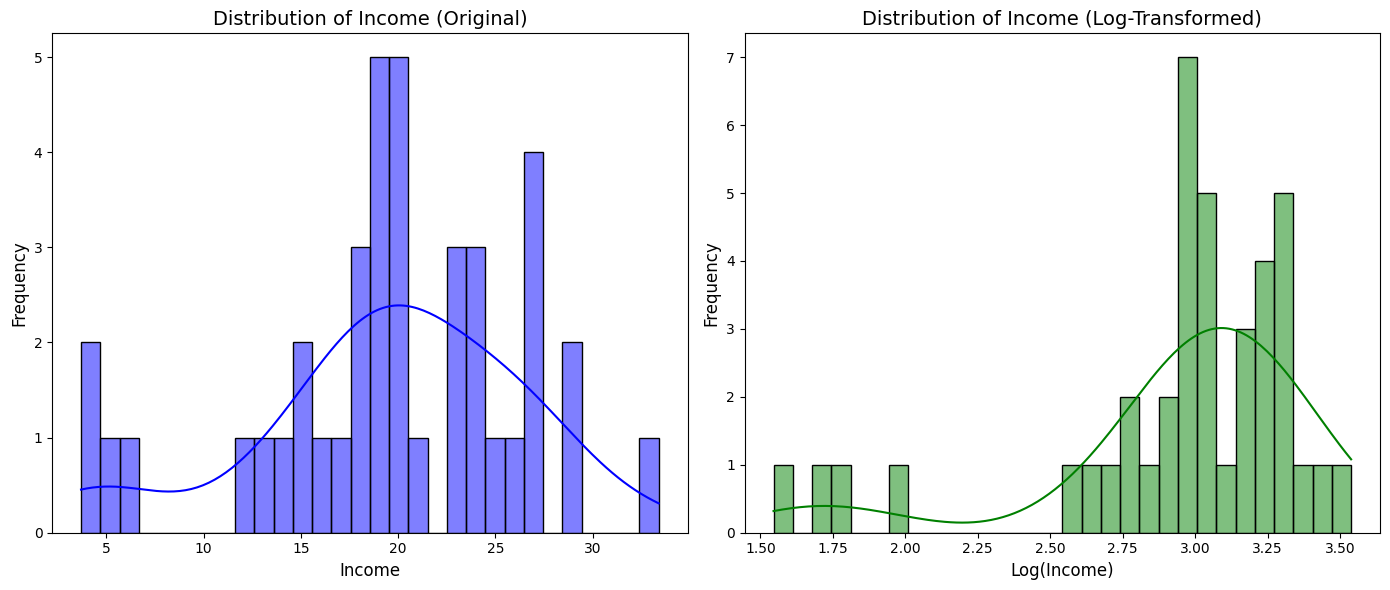

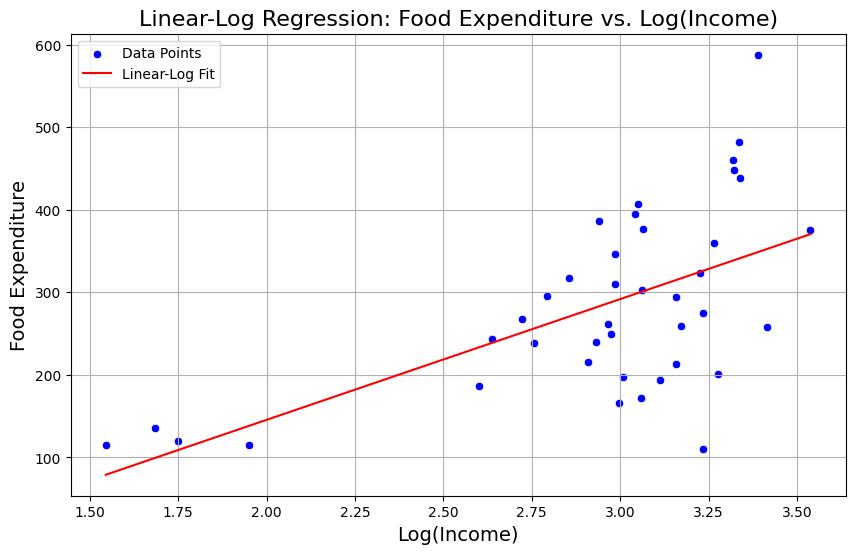

In [90]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming your dataset is already loaded as `df` with columns 'food_exp' and 'income'

# Step 1: Handle zero or negative values in income (if any)
# Add a small constant to avoid log(0) or log(negative)
df['income_log'] = np.log(df['income'] + 1)

# Step 2: Define dependent and independent variables
X = df['income_log']  # Independent variable (log-transformed)
y = df['food_exp']    # Dependent variable (original scale)

# Step 3: Add a constant to the model (intercept)
X = sm.add_constant(X)

# Step 4: Fit the linear-log regression model
model = sm.OLS(y, X).fit()

# Step 5: Print the OLS regression results
print("Linear-Log Regression Results:")
print(model.summary())

# Step 6: Visualize income before and after log transformation
plt.figure(figsize=(14, 6))

# Original income distribution
plt.subplot(1, 2, 1)
sns.histplot(df['income'], kde=True, color='blue', bins=30)
plt.title('Distribution of Income (Original)', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Log-transformed income distribution
plt.subplot(1, 2, 2)
sns.histplot(df['income_log'], kde=True, color='green', bins=30)
plt.title('Distribution of Income (Log-Transformed)', fontsize=14)
plt.xlabel('Log(Income)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# Step 7: Scatter plot with linear-log regression line
plt.figure(figsize=(10, 6))

# Scatter plot of original data
sns.scatterplot(x='income_log', y='food_exp', data=df, color='blue', label='Data Points')

# Predict food expenditure using the fitted linear-log model
df['predicted_food_exp'] = model.predict(X)

# Sort the data by income_log for smooth plotting
df_sorted = df.sort_values(by='income_log')

# Plot the linear-log regression line
plt.plot(df_sorted['income_log'], df_sorted['predicted_food_exp'], color='red', label='Linear-Log Fit')
plt.title('Linear-Log Regression: Food Expenditure vs. Log(Income)', fontsize=16)
plt.xlabel('Log(Income)', fontsize=14)
plt.ylabel('Food Expenditure', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

### Regression with Indicator Variable

In [91]:
file_path = r"D:\Stata-Tutorial\stata\utown.dta"
df1 = pd.read_stata(file_path, convert_categoricals=False)
print(df1.head())

     price   sqft  age  utown  pool  fplace
0  205.452  23.46    6      0     0       1
1  185.328  20.03    5      0     0       1
2  248.422  27.77    6      0     0       0
3  154.690  20.17    1      0     0       0
4  221.801  26.45    0      0     0       1


In [92]:
df1.head()

,price,sqft,age,utown,pool,fplace
0,205.452,23.46,6,0,0,1
1,185.328,20.03,5,0,0,1
2,248.422,27.77,6,0,0,0
3,154.690,20.17,1,0,0,0
4,221.801,26.45,0,0,0,1


In [93]:
df1.shape

(1000, 6)

In [94]:
df1.isnull().sum()

price     0
sqft      0
age       0
utown     0
pool      0
fplace    0
dtype: int64

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1000 non-null   float64
 1   sqft    1000 non-null   float64
 2   age     1000 non-null   int8   
 3   utown   1000 non-null   int8   
 4   pool    1000 non-null   int8   
 5   fplace  1000 non-null   int8   
dtypes: float64(2), int8(4)
memory usage: 19.7 KB


In [96]:
summary = df1.describe(include="all").transpose()
summary["missing"] = df1.isnull().sum()
summary["unique"] = df1.nunique()
print(summary)

         count        mean        std      min        25%       50%       75%  \
price   1000.0  247.655721  42.192729  134.316  215.64675  245.8325  278.2645   
sqft    1000.0   25.209650   2.918480   20.030   22.82750   25.3600   27.7500   
age     1000.0    9.392000   9.426728    0.000    3.00000    6.0000   13.0000   
utown   1000.0    0.519000   0.499889    0.000    0.00000    1.0000    1.0000   
pool    1000.0    0.204000   0.403171    0.000    0.00000    0.0000    0.0000   
fplace  1000.0    0.518000   0.499926    0.000    0.00000    1.0000    1.0000   

            max  missing  unique  
price   345.197        0     996  
sqft     30.000        0     638  
age      60.000        0      49  
utown     1.000        0       2  
pool      1.000        0       2  
fplace    1.000        0       2  


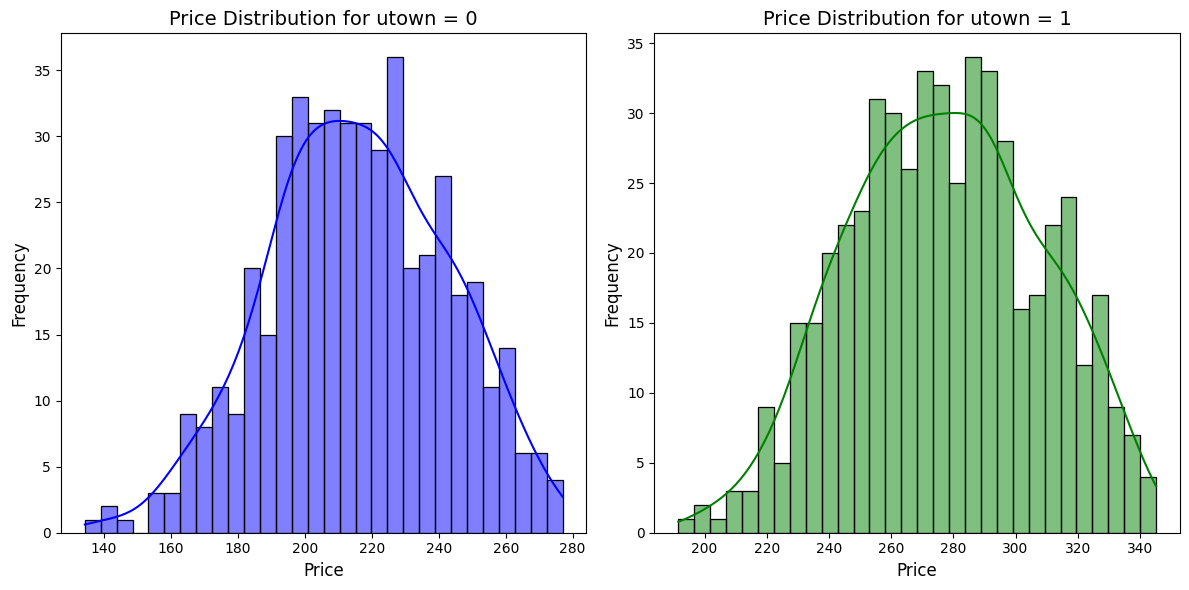

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is already loaded as `df1` with columns 'price' and 'utown'

# Step 1: Filter the data for utown = 0 and utown = 1
df_utown_0 = df1[df1['utown'] == 0]  # Data where utown = 0
df_utown_1 = df1[df1['utown'] == 1]  # Data where utown = 1

# Step 2: Create histograms in two separate frames
plt.figure(figsize=(12, 6))

# Histogram for utown = 0
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(df_utown_0['price'], kde=True, color='blue', bins=30)
plt.title('Price Distribution for utown = 0', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Histogram for utown = 1
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df_utown_1['price'], kde=True, color='green', bins=30)
plt.title('Price Distribution for utown = 1', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

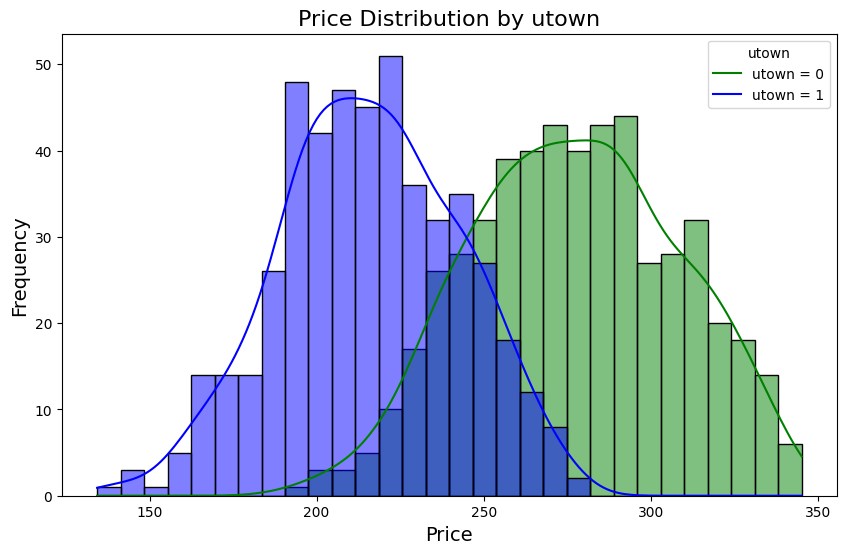

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='price', hue='utown', kde=True, bins=30, palette=['blue', 'green'])
plt.title('Price Distribution by utown', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='utown', labels=['utown = 0', 'utown = 1'])
plt.show()

In [99]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm

# Assuming your dataset is already loaded as `df1` with columns 'price' and 'utown'

# Step 1: Define dependent and independent variables
X = df1['utown']  # Independent variable (binary: 0 or 1)
y = df1['price']  # Dependent variable

# Step 2: Add a constant to the model (intercept)
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Print the regression results
print("Regression Results:")
print(model.summary())

Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          2.65e-166
Time:                        13:12:12   Log-Likelihood:                -4782.0
No. Observations:                1000   AIC:                             9568.
Df Residuals:                     998   BIC:                             9578.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        215.7325      1.318

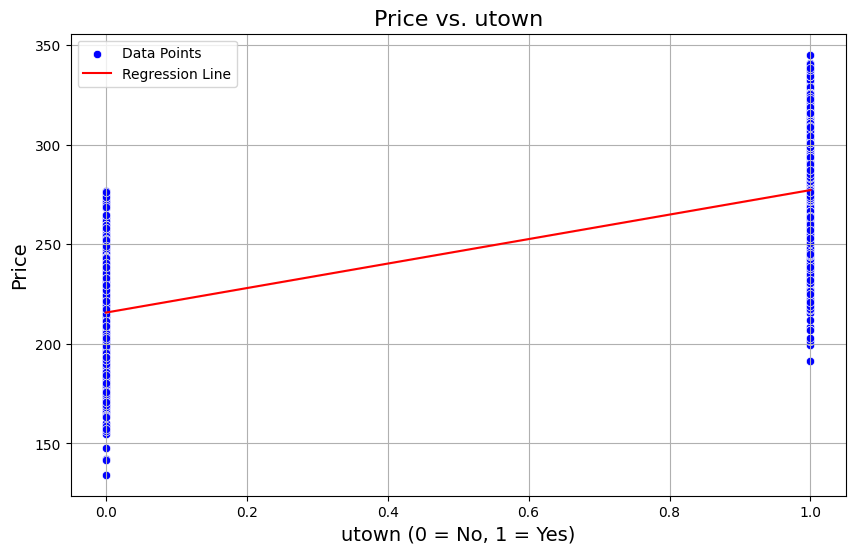

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Predicted values
df1['predicted_price'] = model.predict(X)

# Step 2: Scatter plot with regression means
plt.figure(figsize=(10, 6))
sns.scatterplot(x='utown', y='price', data=df1, color='blue', label='Data Points')
sns.lineplot(x='utown', y='predicted_price', data=df1, color='red', label='Regression Line')
plt.title('Price vs. utown', fontsize=16)
plt.xlabel('utown (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [101]:
!jupyter nbconvert Simple_Regression.ipynb --to latex

[NbConvertApp] Converting notebook Simple_Regression.ipynb to latex
[NbConvertApp] Support files will be in Simple_Regression_files\
[NbConvertApp] Making directory Simple_Regression_files
[NbConvertApp] Writing 127356 bytes to Simple_Regression.tex


In [102]:
!xelatex Simple_Regression.tex -quiet